In [1]:
import numpy as np
import pandas as pd
import math, copy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [3]:
def lossFunc(x, y, v, w):
    m, n = len(x), len(v)
    cost = 0.0
    for i in range(m):
        h_i = []
        for j in range(n):
            h_i.append(sigmoid(v[j].dot(x[i])))
        fw = sigmoid(w.dot(h_i))
        cost += (fw-y[i])**2
    return cost/m

In [4]:
def gradientFunction_w(x, y, v, w, ind): 
    m, n = len(x), len(v)
    grad = 0 
    for i in range(m):
        z_i = 0
        for j in range(n):
            z_i += w[j]*sigmoid(v[j].dot(x[i]))
        fw = sigmoid(z_i)
        grad += 2*(fw - y[i])*fw*(1-fw)*sigmoid(v[ind].dot(x[i])) 
    return grad/m

In [5]:
def gradientFunction_v(x, y, v, w, ind): 
    m, n = len(x), len(v)
    grad = 0
    for i in range(m):
        z_i = 0
        for j in range(n):
            z_i += w[j]*sigmoid(np.dot(v[j],x[i]))
        fw = sigmoid(z_i)
        grad += 2*(fw - y[i])*fw*(1-fw)*w[ind]*sigmoid(v[ind].dot(x[i]))*(1-sigmoid(v[ind].dot(x[i])))*x[i] 
    return grad/m

In [6]:
def gradientDescent(x, y, v, w, eta=0.1, iterations=1000): 
    loss_history = []
    for i in range(iterations):
        grad_w = []
        for j in range(len(v)):
            grad_w.append(gradientFunction_w(x, y, v, w, j))
        w -= eta * np.array(grad_w)
        
        grad_v = []
        for j in range(len(v)):
            grad_v.append(gradientFunction_v(x, y, v, w, j))    
        v = v.astype('float')
        v -= eta * np.array(grad_v)

        loss_history.append(lossFunc(x, y, v, w))

        if i% math.ceil(iterations / 10) == 0:
            print(f"Iteration {i:4d}: Loss {loss_history[-1]}")
    return v, w, loss_history

In [7]:
"""" data reading and processing """
data = pd.read_csv("marathon.csv")

y=data['deposit'].values

data = data.drop("deposit", axis=1)
data = (data-data.min())/(data.max()-data.min())
x = data.values

d = x.shape[1]

v = np.empty(shape=(2,d))
v.fill(0)
w = np.zeros(len(v))

V, W, f = gradientDescent(x, y, v, w, 0.01, 1000)

TypeError: unsupported operand type(s) for -: 'float' and 'str'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


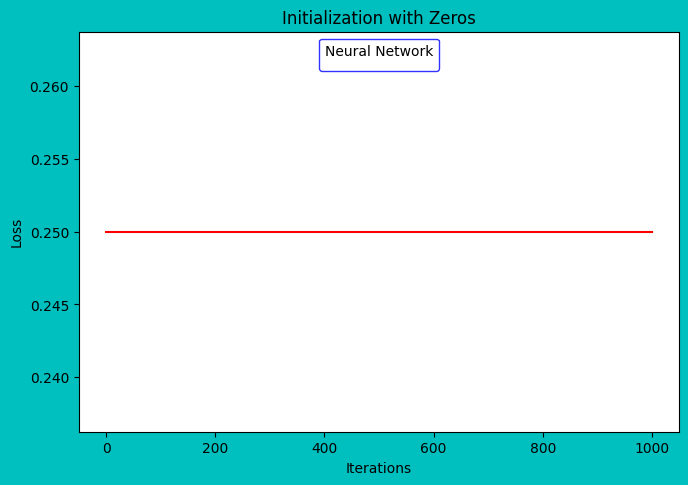

In [8]:
figure = plt.figure(figsize=[6,4],facecolor="c",edgecolor="black",dpi=100)
axis = figure.add_axes([0,0,1,1],projection="rectilinear",xlabel="Iterations",ylabel="Loss",facecolor="w")
plt.title('Initialization with Zeros')
plt.plot(np.arange(1000),f,color='r')
plt.legend(facecolor='white',loc='upper center', edgecolor='b', title='Neural Network')

In [9]:
w = np.random.rand(len(v))
v = np.empty(shape=(2,d))
v.fill(np.random.rand())
V, W, f1 = gradientDescent(x, y, v, w, 0.01, 1000)

Iteration    0: Loss 0.2912814961454421
Iteration  100: Loss 0.2841076773909357
Iteration  200: Loss 0.2778514336754554
Iteration  300: Loss 0.27250529663898637
Iteration  400: Loss 0.2680183322268962
Iteration  500: Loss 0.26431037715025324
Iteration  600: Loss 0.26128588667720304
Iteration  700: Loss 0.2588452576357657
Iteration  800: Loss 0.25689282093255345
Iteration  900: Loss 0.25534165796820346


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


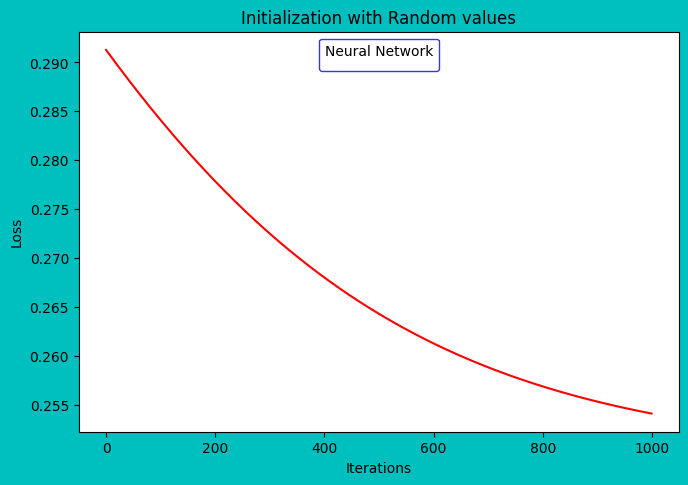

In [10]:
figure = plt.figure(figsize=[6,4],facecolor="c",edgecolor="black",dpi=100)
axis = figure.add_axes([0,0,1,1],projection="rectilinear",xlabel="Iterations",ylabel="Loss",facecolor="w")
plt.title('Initialization with Random values')
plt.plot(np.arange(1000),f1,color='r')
plt.legend(facecolor='white',loc='upper center', edgecolor='b', title='Neural Network')

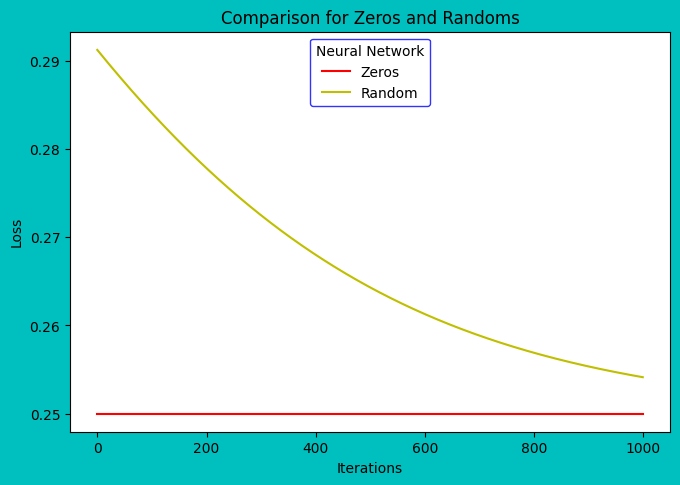

In [11]:
figure = plt.figure(figsize=[6,4],facecolor="c",edgecolor="black",dpi=100)
axis = figure.add_axes([0,0,1,1],projection="rectilinear",xlabel="Iterations",ylabel="Loss",facecolor="w")
plt.title('Comparison for Zeros and Randoms')
plt.plot(np.arange(1000),f,color='r')
plt.plot(np.arange(1000),f1,color='y')
plt.legend(['Zeros','Random'],facecolor='white',loc='upper center', edgecolor='b', title='Neural Network')

In [12]:
w = np.random.rand(len(v))
v = np.empty(shape=(2,d))
v.fill(np.random.rand())
V, W, f1 = gradientDescent(x, y, v, w, 0.1, 1000)
V, W, f2 = gradientDescent(x, y, v, w, 0.05, 1000)
V, W, f3 = gradientDescent(x, y, v, w, 0.01, 1000)
V, W, f4 = gradientDescent(x, y, v, w, 0.005, 1000)
V, W, f5 = gradientDescent(x, y, v, w, 0.001, 1000)

Iteration    0: Loss 0.283656928338464
Iteration  100: Loss 0.25777543086537025
Iteration  200: Loss 0.25144835014108946
Iteration  300: Loss 0.2500108307031775
Iteration  400: Loss 0.24962652001747002
Iteration  500: Loss 0.24945723244646675
Iteration  600: Loss 0.24932259698079925
Iteration  700: Loss 0.24918200131229432
Iteration  800: Loss 0.24902437602490246
Iteration  900: Loss 0.24884475627080999
Iteration    0: Loss 0.25006106736020517
Iteration  100: Loss 0.24994221442237458
Iteration  200: Loss 0.24984977745583112
Iteration  300: Loss 0.24976827247858682
Iteration  400: Loss 0.24969073088584462
Iteration  500: Loss 0.24961388451341196
Iteration  600: Loss 0.2495360719170516
Iteration  700: Loss 0.24945632745010998
Iteration  800: Loss 0.2493739845082345
Iteration  900: Loss 0.24928850235614042
Iteration    0: Loss 0.24999274848577602
Iteration  100: Loss 0.2499748366208958
Iteration  200: Loss 0.24995712692251343
Iteration  300: Loss 0.24993958583746337
Iteration  400: Loss 0

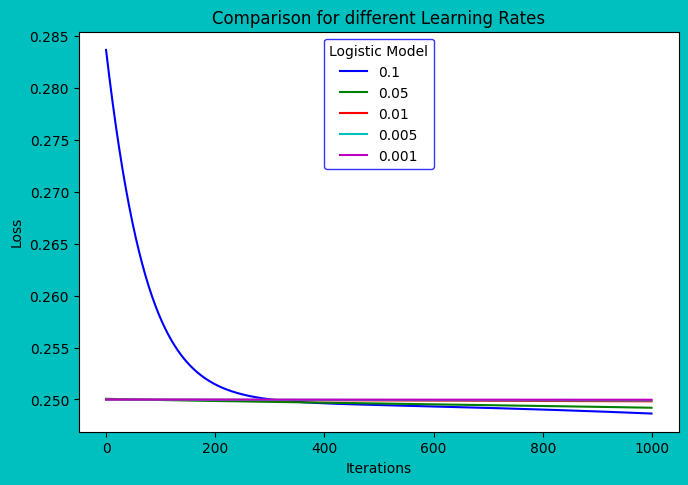

In [13]:
figure = plt.figure(figsize=[6,4],facecolor="c",edgecolor="black",dpi=100)
axis = figure.add_axes([0,0,1,1],projection="rectilinear",xlabel="Iterations",ylabel="Loss",facecolor="w")
plt.title('Comparison for different Learning Rates')
plt.plot(np.arange(1000),f1,color='b')
plt.plot(np.arange(1000),f2,color='g')
plt.plot(np.arange(1000),f3,color='r')
plt.plot(np.arange(1000),f4,color='c')
plt.plot(np.arange(1000),f5,color='m')
plt.legend(['0.1','0.05', '0.01', '0.005', '0.001'],facecolor='white',loc='upper center', edgecolor='b', title='Logistic Model')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x = X_train
y = y_train

V, W, f5 = gradientDescent(x, y, v, w, 0.1, 10000)

Iteration    0: Loss 0.24999291766344875
Iteration 1000: Loss 0.2477785496769844
Iteration 2000: Loss 0.24184947647373192
Iteration 3000: Loss 0.23226825154221403
Iteration 4000: Loss 0.22354401929986964
Iteration 5000: Loss 0.21447405792995705
Iteration 6000: Loss 0.20417117990943884
Iteration 7000: Loss 0.19375760991669835
Iteration 8000: Loss 0.18445345607450675
Iteration 9000: Loss 0.17696365005726827


In [15]:
W

array([ 4.23808431, -4.25331626])

In [16]:
def pred(x, v, w):
    Y = []
    m, n = len(x), len(v)
    for i in range(m):
        h_i = []
        for j in range(n):
            h_i.append(sigmoid(v[j].dot(x[i])))
        fw = sigmoid(w.dot(h_i))
        if fw>= 0.5:
            Y.append(1)
        else:
            Y.append(0)
    return Y

In [17]:
pred_y = pred(X_test, V, W)

In [18]:
accuracy_score(y_test, pred_y)

0.7393767705382436